In [195]:
from devsim import *

In [196]:
from devsim.python_packages.simple_physics import *

In [197]:
reset_devsim()

Resetting DEVSIM


In [198]:
def createMesh(device, region):
  create_1d_mesh(mesh="dio")
  add_1d_mesh_line(mesh="dio", pos=0, ps=1e-7, tag="top")
  add_1d_mesh_line(mesh="dio", pos=0.5e-5, ps=1e-9, tag="mid")
  add_1d_mesh_line(mesh="dio", pos=1e-5, ps=1e-7, tag="bot")
  add_1d_contact  (mesh="dio", name="top", tag="top", material="metal")
  add_1d_contact  (mesh="dio", name="bot", tag="bot", material="metal")
  add_1d_region   (mesh="dio", material="Si", region=region, tag1="top", tag2="bot")
  finalize_mesh(mesh="dio")
  create_device(mesh="dio", device=device)

device="MyDevice"
region="MyRegion"

createMesh(device, region)

mid
bot
 (region: MyRegion)
 (contact: top)
 (contact: bot)


In [199]:
SetSiliconParameters(device, region, 300)
set_parameter(device=device, region=region, name="taun", value=1e-8)
set_parameter(device=device, region=region, name="taup", value=1e-8)

In [200]:
CreateNodeModel(device, region, "Acceptors", "1.0e18*step(0.5e-5-x)")
CreateNodeModel(device, region, "Donors",    "1.0e18*step(x-0.5e-5)")
CreateNodeModel(device, region, "NetDoping", "Donors-Acceptors")

In [201]:
CreateSolution(device, region, "Potential")

In [202]:
CreateSiliconPotentialOnly(device, region)

In [203]:
for i in get_contact_list(device=device):
  set_parameter(device=device, name=GetContactBiasName(i), value=0.0)
  CreateSiliconPotentialOnlyContact(device, region, i)

In [204]:
solve(type="dc", absolute_error=1.0, relative_error=1e-12, maximum_iterations=30)

number of equations 465
Iteration: 0
  Device: "MyDevice"	RelError: 1.00000e+00	AbsError: 8.88882e-02
    Region: "MyRegion"	RelError: 1.00000e+00	AbsError: 8.88882e-02
      Equation: "PotentialEquation"	RelError: 1.00000e+00	AbsError: 8.88882e-02
Iteration: 1
  Device: "MyDevice"	RelError: 4.91285e-01	AbsError: 8.58427e-02
    Region: "MyRegion"	RelError: 4.91285e-01	AbsError: 8.58427e-02
      Equation: "PotentialEquation"	RelError: 4.91285e-01	AbsError: 8.58427e-02
Iteration: 2
  Device: "MyDevice"	RelError: 3.20761e-01	AbsError: 8.25143e-02
    Region: "MyRegion"	RelError: 3.20761e-01	AbsError: 8.25143e-02
      Equation: "PotentialEquation"	RelError: 3.20761e-01	AbsError: 8.25143e-02
Iteration: 3
  Device: "MyDevice"	RelError: 2.34478e-01	AbsError: 7.87938e-02
    Region: "MyRegion"	RelError: 2.34478e-01	AbsError: 7.87938e-02
      Equation: "PotentialEquation"	RelError: 2.34478e-01	AbsError: 7.87938e-02
Iteration: 4
  Device: "MyDevice"	RelError: 1.94308e-01	AbsError: 7.35513e-0

In [205]:
CreateSolution(device, region, "Electrons")
CreateSolution(device, region, "Holes")

In [206]:
set_node_values(device=device, region=region,
  name="Electrons", init_from="IntrinsicElectrons")
set_node_values(device=device, region=region,
  name="Holes", init_from="IntrinsicHoles")


In [207]:
CreateSiliconDriftDiffusion(device, region)
for i in get_contact_list(device=device):
  CreateSiliconDriftDiffusionAtContact(device, region, i)

Region: MyRegion, Equation: PotentialEquation, Variable: Potential


In [208]:
solve(type="dc", absolute_error=1e10, relative_error=1e-10, maximum_iterations=30)

number of equations 1395
Iteration: 0
  Device: "MyDevice"	RelError: 4.03566e-14	AbsError: 1.02400e+04
    Region: "MyRegion"	RelError: 4.03566e-14	AbsError: 1.02400e+04
      Equation: "ElectronContinuityEquation"	RelError: 9.54053e-15	AbsError: 5.12000e+03
      Equation: "HoleContinuityEquation"	RelError: 8.69665e-15	AbsError: 5.12000e+03
      Equation: "PotentialEquation"	RelError: 2.21194e-14	AbsError: 1.21399e-16


In [209]:
v = 0.0
while v < 0.51:
  set_parameter(device=device, name=GetContactBiasName("top"), value=v)
  solve(type="dc", absolute_error=1e10, relative_error=1e-10, maximum_iterations=30)
  PrintCurrents(device, "top")
  PrintCurrents(device, "bot")
  v += 0.1

number of equations 1395
Iteration: 0
  Device: "MyDevice"	RelError: 2.70390e-14	AbsError: 3.85741e+02
    Region: "MyRegion"	RelError: 2.70390e-14	AbsError: 3.85741e+02
      Equation: "ElectronContinuityEquation"	RelError: 1.85016e-15	AbsError: 1.65364e+02
      Equation: "HoleContinuityEquation"	RelError: 1.32563e-15	AbsError: 2.20377e+02
      Equation: "PotentialEquation"	RelError: 2.38633e-14	AbsError: 3.69250e-17
top	0.0	-8.693443938556645e-25	-2.1558854434500004e-09	-2.1558854434500012e-09
bot	0.0	-4.7046820549940125e-08	-2.0451104162455877e-24	-4.7046820549940125e-08
number of equations 1395
Iteration: 0
  Device: "MyDevice"	RelError: 3.68696e+02	AbsError: 2.08298e+17
    Region: "MyRegion"	RelError: 3.68696e+02	AbsError: 2.08298e+17
      Equation: "ElectronContinuityEquation"	RelError: 7.73734e-01	AbsError: 1.04110e+17
      Equation: "HoleContinuityEquation"	RelError: 7.73744e-01	AbsError: 1.04189e+17
      Equation: "PotentialEquation"	RelError: 3.67148e+02	AbsError: 4.095

In [210]:
write_devices(file="diode_1d.dat", type="tecplot")

In [234]:
import numpy as np
import matplotlib.pyplot as plt

In [241]:
x = get_node_model_values(device="MyDevice", region="MyRegion", name="x")

# Retrieve simulation results
acceptors = get_node_model_values(device="MyDevice", region="MyRegion", name="Acceptors")
donors = get_node_model_values(device="MyDevice", region="MyRegion", name="Donors")
electrons = get_node_model_values(device="MyDevice", region="MyRegion", name="Electrons")
holes = get_node_model_values(device="MyDevice", region="MyRegion", name="Holes")

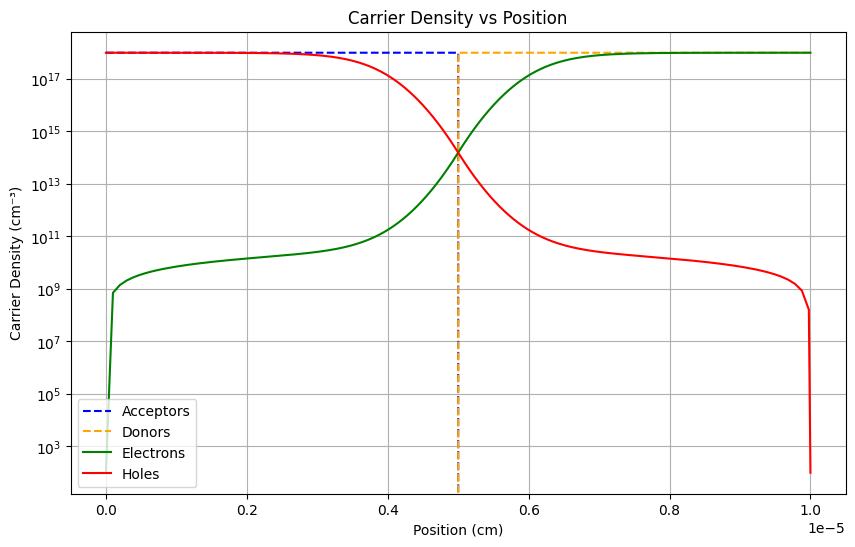

In [243]:
plt.figure(figsize=(10, 6))
plt.plot(x, acceptors, label="Acceptors", linestyle='--', color='blue')
plt.plot(x, donors, label="Donors", linestyle='--', color='orange')
plt.plot(x, electrons, label="Electrons", color='green')
plt.plot(x, holes, label="Holes", color='red')

plt.xlabel("Position (cm)")
plt.ylabel("Carrier Density (cm⁻³)")
plt.title("Carrier Density vs Position")
plt.yscale("log")  # Use logarithmic scale for better visualization
plt.grid(True)
plt.legend()
plt.show()

In [249]:
# Retrieve potential and electric field values
potential = get_node_model_values(device="MyDevice", region="MyRegion", name="Potential")
electric_field = get_edge_model_values(device="MyDevice", region="MyRegion", name="ElectricField")

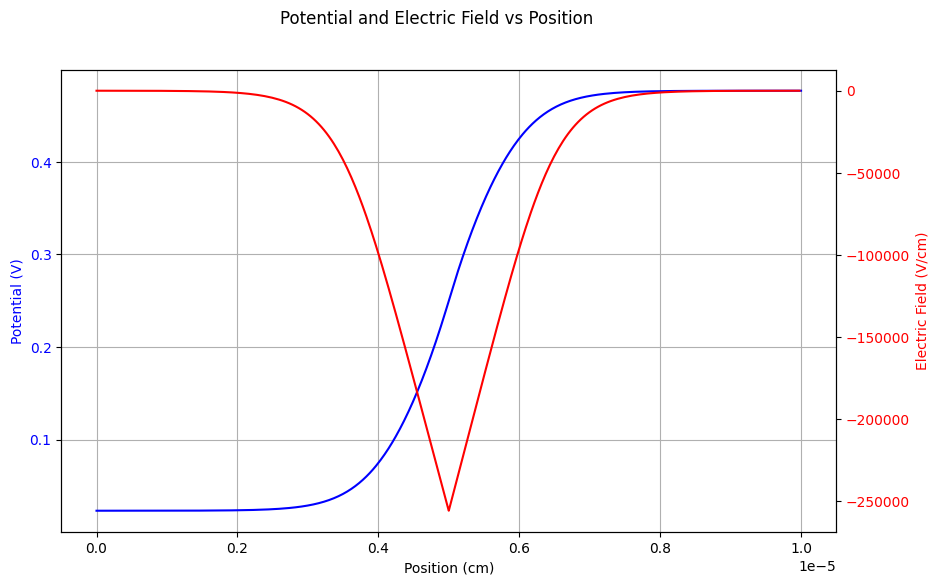

In [255]:
# Plot potential and electric field
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot potential on primary y-axis
ax1.plot(x, potential, label="Potential (V)", color='blue')
ax1.set_xlabel("Position (cm)")
ax1.set_ylabel("Potential (V)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Plot electric field on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(x[:-1], electric_field, label="Electric Field (V/cm)", color='red')
ax2.set_ylabel("Electric Field (V/cm)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle("Potential and Electric Field vs Position")
plt.show()

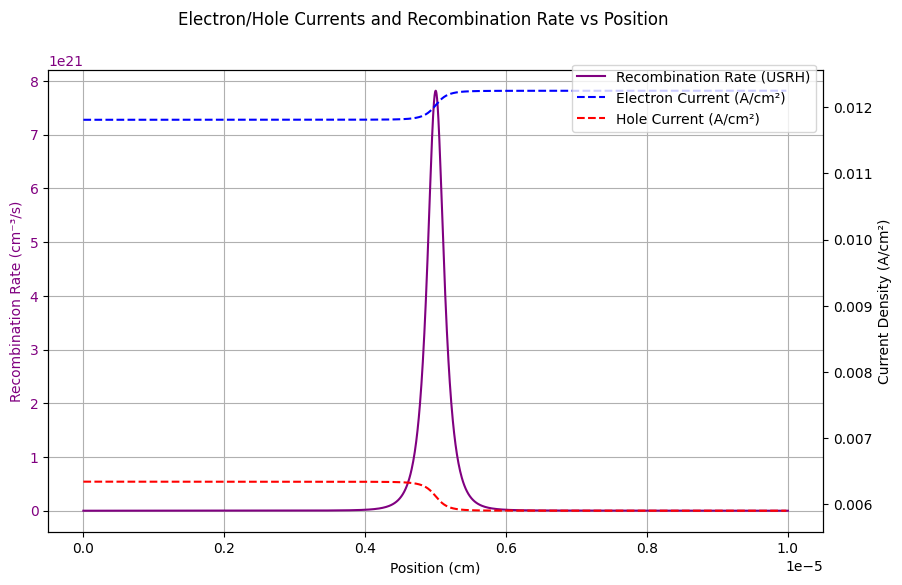

In [259]:
# Retrieve recombination rate and currents
usrh = get_node_model_values(device="MyDevice", region="MyRegion", name="USRH")
electron_current = get_edge_model_values(device="MyDevice", region="MyRegion", name="ElectronCurrent")
hole_current = get_edge_model_values(device="MyDevice", region="MyRegion", name="HoleCurrent")

# Plot recombination rate and currents
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot recombination rate on primary y-axis
ax1.plot(x, usrh, label="Recombination Rate (USRH)", color='purple')
ax1.set_xlabel("Position (cm)")
ax1.set_ylabel("Recombination Rate (cm⁻³/s)", color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.grid(True)

# Plot electron and hole currents on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(x[:-1], electron_current, label="Electron Current (A/cm²)", color='blue', linestyle='--')
ax2.plot(x[:-1], hole_current, label="Hole Current (A/cm²)", color='red', linestyle='--')
ax2.set_ylabel("Current Density (A/cm²)", color='black')
ax2.tick_params(axis='y', labelcolor='black')

fig.suptitle("Electron/Hole Currents and Recombination Rate vs Position")
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.show()
